<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


In [1]:
#pip install wget

## Demo: How to work with database


Download database file.


In [2]:
#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"
response = requests.get(url)

with open("m4_survey_data.sqlite", "wb") as f:
    f.write(response.content)

Connect to the database.


In [3]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [4]:
import pandas as pd

## Demo: How to run an sql query


In [5]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [6]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [7]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [8]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [9]:
# Query to select all rows from the 'master' table
QUERY_ALL = "SELECT * FROM master"

# Read the data into a DataFrame
df = pd.read_sql_query(QUERY_ALL, conn)

# Display the first few rows of the DataFrame
print(df.head())

   index  Respondent                      MainBranch Hobbyist  \
0      0           4  I am a developer by profession       No   
1      1           9  I am a developer by profession      Yes   
2      2          13  I am a developer by profession      Yes   
3      3          16  I am a developer by profession      Yes   
4      4          17  I am a developer by profession      Yes   

                                         OpenSourcer  \
0                                              Never   
1                         Once a month or more often   
2  Less than once a month but more than once per ...   
3                                              Never   
4  Less than once a month but more than once per ...   

                                          OpenSource          Employment  \
0  The quality of OSS and closed source software ...  Employed full-time   
1  The quality of OSS and closed source software ...  Employed full-time   
2  OSS is, on average, of HIGHER quality tha

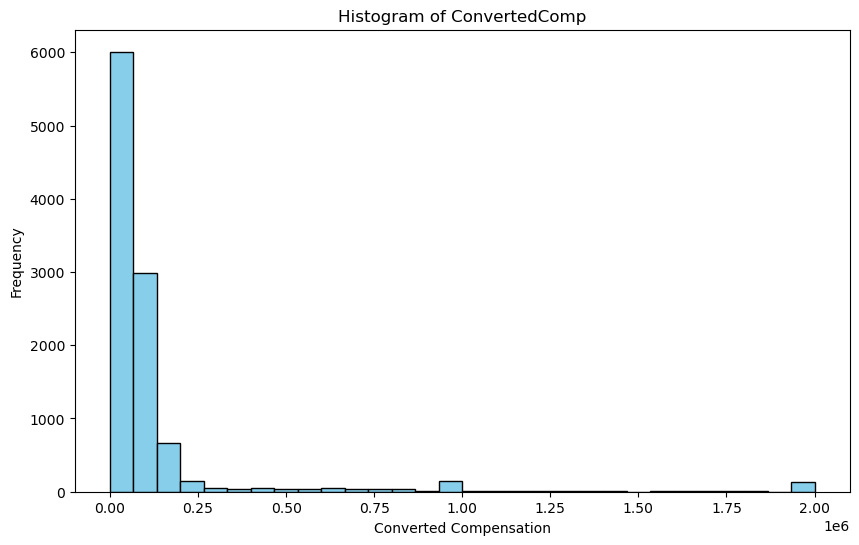

In [10]:
# your code goes here
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.show()

### Box Plots


Plot a box plot of `Age.`


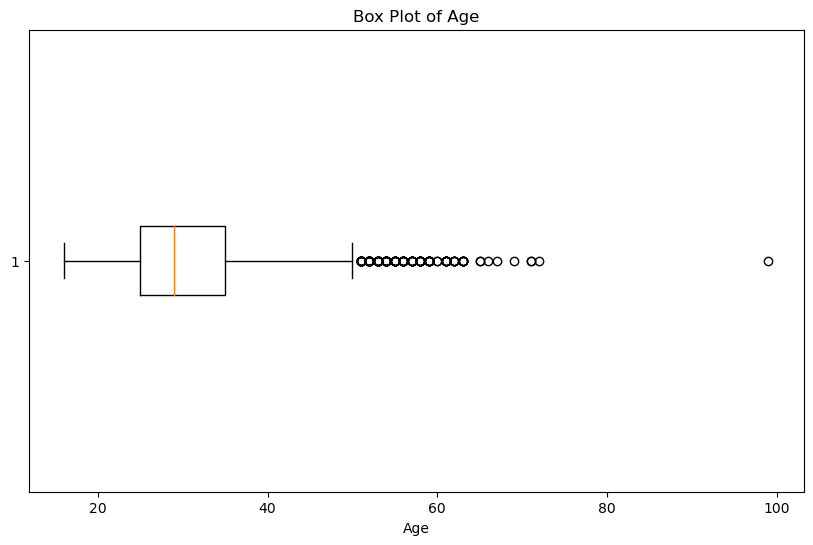

In [11]:
import matplotlib.pyplot as plt

# Drop rows with missing values in the 'Age' column
df_age_dropna = df.dropna(subset=['Age'])

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a box plot for the 'Age' column after dropping missing values
plt.boxplot(df_age_dropna['Age'], vert=False)

# Set the title and labels
plt.title('Box Plot of Age')
plt.xlabel('Age')

# Show the plot
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


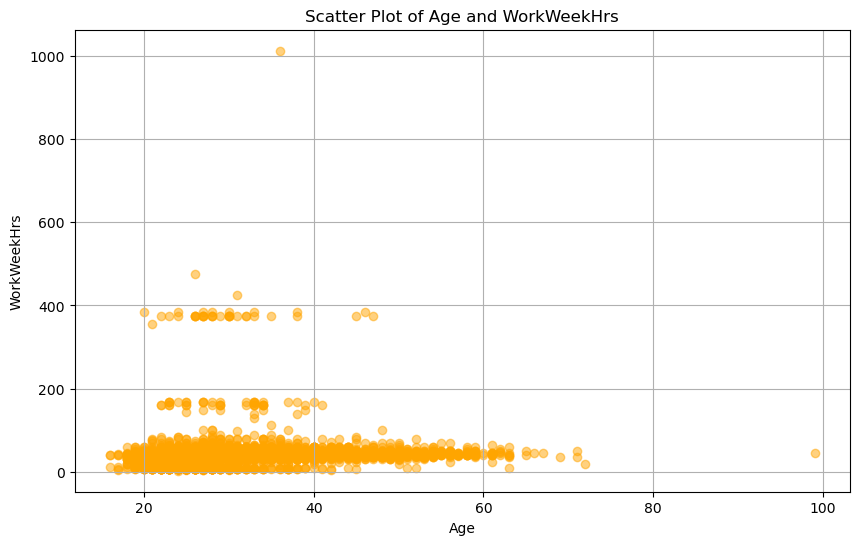

In [12]:
# your code goes here
import matplotlib.pyplot as plt

# Scatter plot of Age and WorkWeekHrs
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['WorkWeekHrs'], alpha=0.5, color='orange')
plt.title('Scatter Plot of Age and WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.grid(True)
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


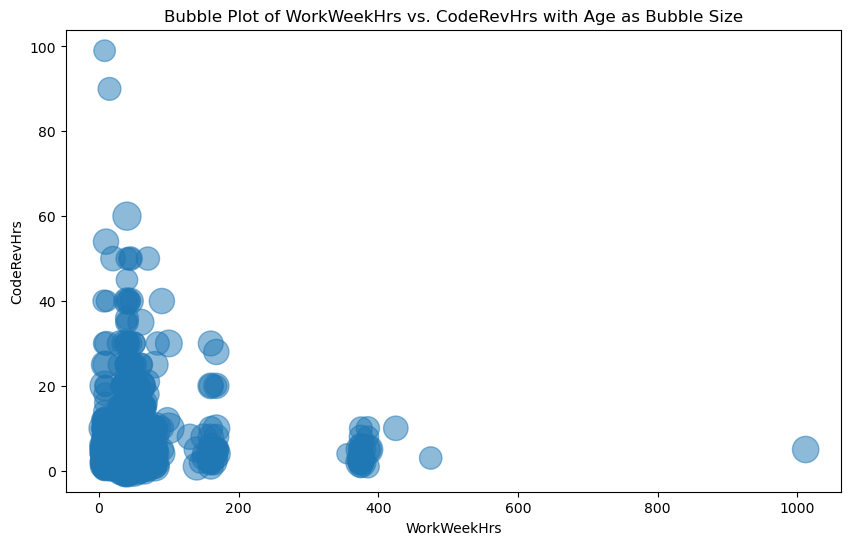

In [13]:
# your code goes here
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'WorkWeekHrs', 'CodeRevHrs', and 'Age'
plt.figure(figsize=(10, 6))

# Scatter plot with bubble size based on the 'Age' column
plt.scatter(df['WorkWeekHrs'], df['CodeRevHrs'], s=df['Age']*10, alpha=0.5)

# Set labels and title
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.title('Bubble Plot of WorkWeekHrs vs. CodeRevHrs with Age as Bubble Size')

# Show the plot
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


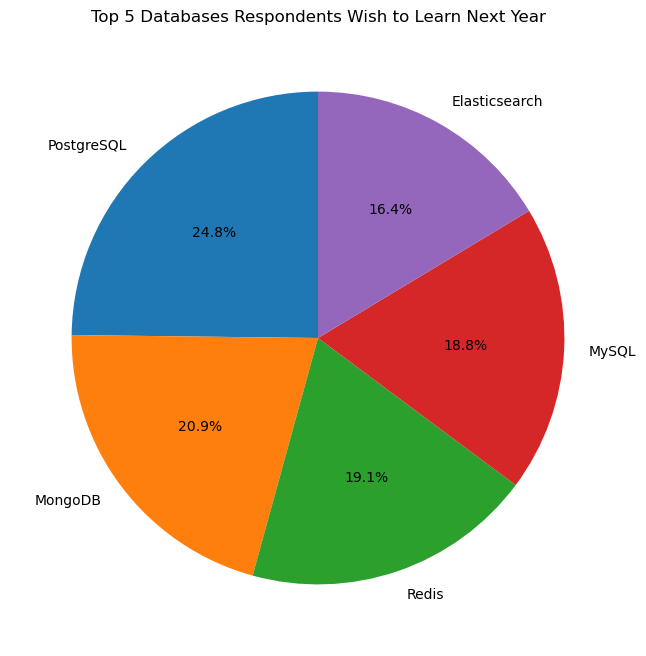

In [14]:
# your code goes here

import matplotlib.pyplot as plt

# Query to get the top 5 databases respondents wish to learn next year
QUERY_DATABASES = """
SELECT DatabaseDesireNextYear, COUNT(*) as Count
FROM DatabaseDesireNextYear
WHERE DatabaseDesireNextYear IS NOT NULL
GROUP BY DatabaseDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""

# Read the data into a DataFrame
df_databases = pd.read_sql_query(QUERY_DATABASES, conn)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_databases['Count'], labels=df_databases['DatabaseDesireNextYear'], autopct='%1.1f%%', startangle=90)

# Set the title
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')

# Show the plot
plt.show()

In [15]:
# In the list of most popular languages respondents wish to learn next year, what is the rank of Python?

# SQL query to find the rank of Python in the list of languages respondents wish to learn next year
QUERY = """
SELECT LanguageDesireNextYear, COUNT(*) as RespondentCount
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY RespondentCount DESC
"""

# Execute the query and store the result in a Pandas DataFrame
language_rank_df = pd.read_sql_query(QUERY, conn)

# Find the rank of Python in the DataFrame
python_rank = language_rank_df[language_rank_df['LanguageDesireNextYear'] == 'Python'].index[0] + 1

# Print the rank of Python
print("Rank of Python in languages respondents wish to learn next year:", python_rank)

Rank of Python in languages respondents wish to learn next year: 3


In [16]:
# How many respondents indicated that they currently work with 'SQL'? 

# SQL query to count respondents currently working with 'SQL'
QUERY = """
SELECT COUNT(*) as RespondentCount
FROM DatabaseWorkedWith
WHERE LOWER(DatabaseWorkedWith) = 'sql'
"""

# Execute the query and store the result in a Pandas DataFrame
sql_users_count_df = pd.read_sql_query(QUERY, conn)

# Get the count of respondents working with 'SQL'
sql_users_count = sql_users_count_df['RespondentCount'].values[0]

# Print the result
print("Number of respondents currently working with 'SQL':", sql_users_count)


Number of respondents currently working with 'SQL': 0


In [17]:
# How many respondents indicated that they work on 'MySQL'                    NOT ... only? 

# SQL query to count respondents working only on 'MySQL'
QUERY = """
SELECT COUNT(*) as RespondentCount
FROM DatabaseWorkedWith
WHERE LOWER(DatabaseWorkedWith) = 'mysql'
"""

# Execute the query and store the result in a Pandas DataFrame
mysql_only_users_count_df = pd.read_sql_query(QUERY, conn)

# Get the count of respondents working only on 'MySQL'
mysql_only_users_count = mysql_only_users_count_df['RespondentCount'].values[0]

# Print the result
print("Number of respondents working only with 'MySQL':", mysql_only_users_count)


Number of respondents working only with 'MySQL': 5469


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


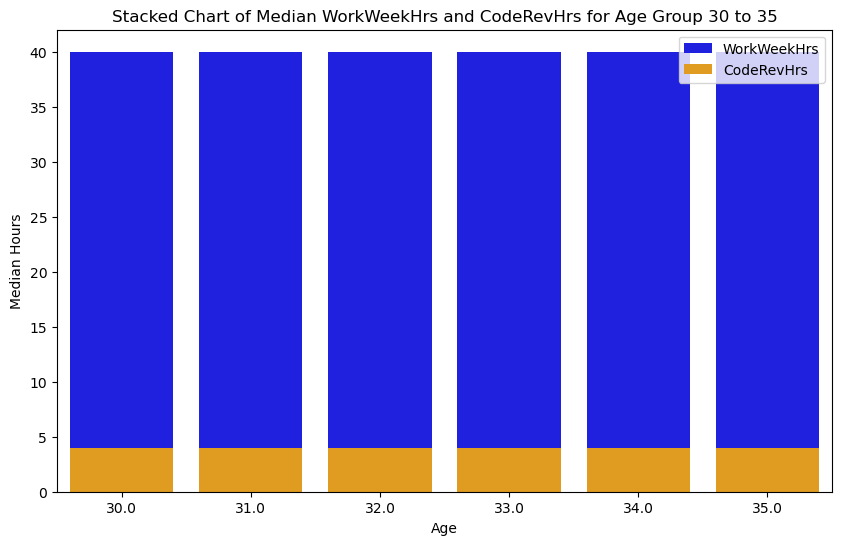

In [18]:
# your code goes here

import seaborn as sns

# Query to get data for the specified age group
QUERY_AGE_GROUP = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
"""

# Read the data into a DataFrame
df_age_group = pd.read_sql_query(QUERY_AGE_GROUP, conn)

# Calculate median values
median_values = df_age_group.groupby('Age').median().reset_index()

# Create a stacked bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=median_values, x='Age', y='WorkWeekHrs', color='blue', label='WorkWeekHrs')
sns.barplot(data=median_values, x='Age', y='CodeRevHrs', color='orange', label='CodeRevHrs')

# Set the title and labels
plt.title('Stacked Chart of Median WorkWeekHrs and CodeRevHrs for Age Group 30 to 35')
plt.xlabel('Age')
plt.ylabel('Median Hours')

# Show the legend
plt.legend()

# Show the plot
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


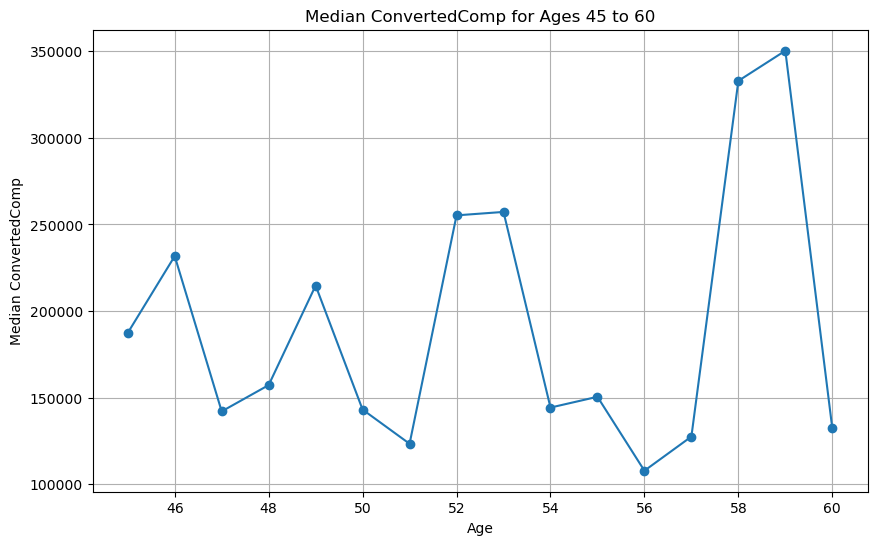

In [19]:
# your code goes here

import matplotlib.pyplot as plt

# SQL query to retrieve data for ages from 45 to 60
QUERY = """
SELECT Age, AVG(ConvertedComp) as MedianConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
GROUP BY Age
ORDER BY Age
"""

# Execute the query and store the result in a Pandas DataFrame
age_salary_df = pd.read_sql_query(QUERY, conn)

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(age_salary_df['Age'], age_salary_df['MedianConvertedComp'], marker='o', linestyle='-')
plt.title('Median ConvertedComp for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.grid(True)
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


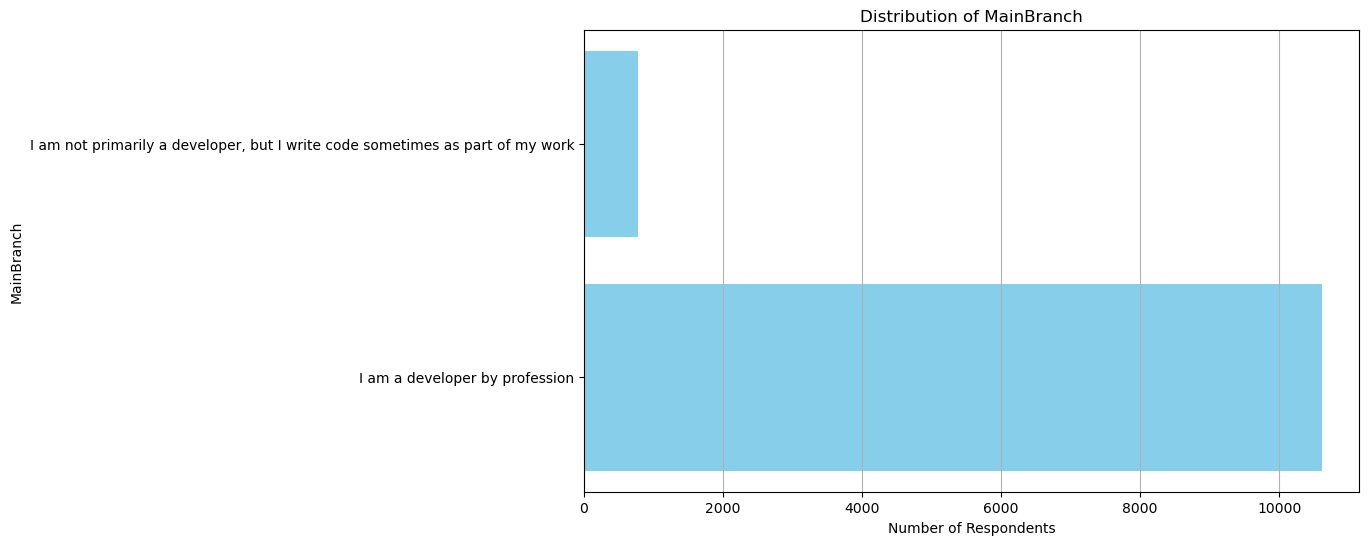

In [20]:
# your code goes here

# SQL query to retrieve data for the MainBranch column
QUERY = """
SELECT MainBranch, COUNT(*) as RespondentCount
FROM master
GROUP BY MainBranch
"""

# Execute the query and store the result in a Pandas DataFrame
main_branch_df = pd.read_sql_query(QUERY, conn)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(main_branch_df['MainBranch'], main_branch_df['RespondentCount'], color='skyblue')
plt.title('Distribution of MainBranch')
plt.xlabel('Number of Respondents')
plt.ylabel('MainBranch')
plt.grid(axis='x')
plt.show()

In [21]:
# Majority of the survey responders are

# SQL query to count the number of respondents for each DevType
QUERY = """
SELECT DevType, COUNT(*) as RespondentCount
FROM DevType
GROUP BY DevType
ORDER BY RespondentCount DESC
"""

# Execute the query and store the result in a Pandas DataFrame
devtype_count_df = pd.read_sql_query(QUERY, conn)

# Print the result
print(devtype_count_df)

                                          DevType  RespondentCount
0                           Developer, full-stack             6928
1                             Developer, back-end             6290
2                            Developer, front-end             3920
3   Developer, desktop or enterprise applications             2575
4                               Developer, mobile             1959
5                               DevOps specialist             1639
6                          Database administrator             1413
7                            System administrator             1202
8                                        Designer              988
9                           Developer, QA or test              911
10    Developer, embedded applications or devices              854
11                                 Engineer, data              832
12  Data scientist or machine learning specialist              803
13                       Data or business analyst             

Close the database connection.


In [22]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
